In [ ]:
pip install ucimlrepo

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

Base de dados

A base de dados "Connectionist Bench Sonar, Mines vs. Rocks" trata-se de 208 amostras divididas em duas classes: "Mines" (minas) e "Rocks" (rochas), que foram determinadas por um aparelho de sonar. Nesse banco há um desbalanceamento entre as classes, havendo 111 amostras de minas e 97 de rochas. Cada amostra é representada por 60 features acústicas (no intervalo 0.0 a 1.0), representando características como amplitude e frequência do sinal de sonar.

Leitura

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
connectionist_bench_sonar_mines_vs_rocks = fetch_ucirepo(id=151)
dataset = connectionist_bench_sonar_mines_vs_rocks

# data (features e targets)
X = dataset.data.features
y = dataset.data.targets['class']

# metadata
print(dataset.metadata)

# informação das variáveis
print(dataset.variables)

# chaves
print(dataset.keys())

{'uci_id': 151, 'name': 'Connectionist Bench (Sonar, Mines vs. Rocks)', 'repository_url': 'https://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks', 'data_url': 'https://archive.ics.uci.edu/static/public/151/data.csv', 'abstract': 'The task is to train a network to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock.', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 208, 'num_features': 60, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': None, 'dataset_doi': '10.24432/C5T01Q', 'creators': ['Terry Sejnowski', 'R. Gorman'], 'intro_paper': None, 'additional_info': {'summary': 'The file "sonar.mines" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various a

In [3]:
# Visualizando se há features nulas
X.isna().sum()

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
Attribute21    0
Attribute22    0
Attribute23    0
Attribute24    0
Attribute25    0
Attribute26    0
Attribute27    0
Attribute28    0
Attribute29    0
Attribute30    0
Attribute31    0
Attribute32    0
Attribute33    0
Attribute34    0
Attribute35    0
Attribute36    0
Attribute37    0
Attribute38    0
Attribute39    0
Attribute40    0
Attribute41    0
Attribute42    0
Attribute43    0
Attribute44    0
Attribute45    0
Attribute46    0
Attribute47    0
Attribute48    0
Attribute49    0
Attribute50    0
Attribute51    0
Attribute52    0
Attribute53    0
Attribute54    0
Attribute55    0
Attribute56    0
Attribute57    0
Attribute58    0
Attribute59   

Não há

In [4]:
X.isna().sum().sum()

0

In [5]:
# Visualizando se há targets nulos
y.isna().sum()

0

Não há

In [6]:
y.isna().sum().sum()

0

In [ ]:
# Verificando as primeiras linhas do DataFrame
print(X.head())


   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0      0.0200      0.0371      0.0428      0.0207      0.0954      0.0986   
1      0.0453      0.0523      0.0843      0.0689      0.1183      0.2583   
2      0.0262      0.0582      0.1099      0.1083      0.0974      0.2280   
3      0.0100      0.0171      0.0623      0.0205      0.0205      0.0368   
4      0.0762      0.0666      0.0481      0.0394      0.0590      0.0649   

   Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute51  \
0      0.1539      0.1601      0.3109       0.2111  ...       0.0232   
1      0.2156      0.3481      0.3337       0.2872  ...       0.0125   
2      0.2431      0.3771      0.5598       0.6194  ...       0.0033   
3      0.1098      0.1276      0.0598       0.1264  ...       0.0241   
4      0.1209      0.2467      0.3564       0.4459  ...       0.0156   

   Attribute52  Attribute53  Attribute54  Attribute55  Attribute56  \
0       0.0027       0.0065       

<Axes: >

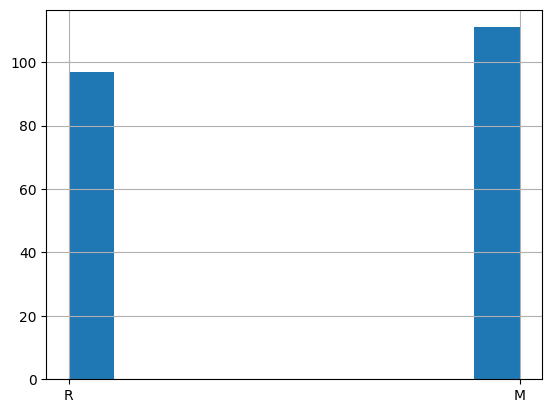

In [ ]:
y.hist()

O histograma mostra que há uma leve diferença entre o número de minas e de rochas, sendo ligeiramente maior nas minas.

<Figure size 640x480 with 0 Axes>

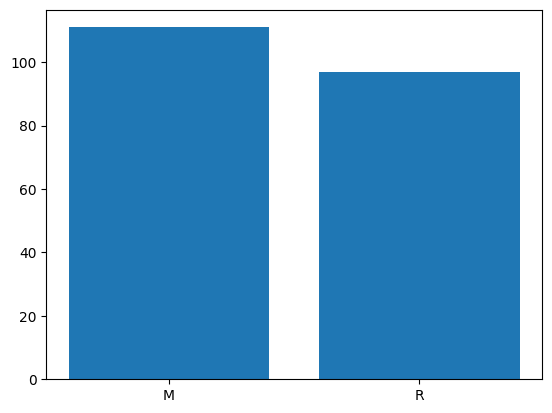

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
counts = y.value_counts()
plt.bar(counts.index, counts.values)
plt.figure()

Gráfico de barra mostrando os mesmos resultados do histograma.

In [ ]:
# correlação de Pearson
from scipy.stats import pearsonr

# Trocando Rocha por 0 e Mina por 1
new_df = y.replace({'R': 0, 'M': 1})

# Comparando atributos
correlacao = []
for i in X:
  correlacao.append((X[i]).corr(new_df))

print(correlacao)

[0.2716941061552169, 0.23123798457330422, 0.19219474575588694, 0.250638458840881, 0.22223183509528327, 0.1323265038357388, 0.11474838990488467, 0.18931427518778413, 0.3214483861926136, 0.34114184881222637, 0.43285492368923395, 0.39224547508336277, 0.31281078441856963, 0.15727739498580579, 0.05731769132397205, 0.011580721727747536, -0.003969029827377493, 0.014611823008338545, 0.13820438401269886, 0.22411521580305546, 0.24275534419544448, 0.20136125676036162, 0.1274126457650446, 0.07404134941875706, 0.025305664021725988, 0.02806327522247735, 0.054996823901805846, 0.08248581246510887, 0.036638793348250015, 0.004218891118555813, -0.11072839858997983, -0.05527465347013295, -0.10718441047188139, -0.17201029020328612, -0.2276698487978128, -0.26915122446273715, -0.20905471939422782, -0.04052700021989437, 0.05691018682844753, -0.03592762436397882, 0.020942116451807265, 0.14414716825524582, 0.23407697308864783, 0.27377897096428994, 0.33940590895164124, 0.3056099664485241, 0.3016966629085168, 0.3

In [ ]:
print("Menor Valor: "+str(min(correlacao)))
print("Maior Valor: "+str(max(correlacao)))
mean = sum(correlacao) / len(correlacao)
print("Média: " + str(mean))
res = sum((i - mean) ** 2 for i in correlacao) / len(correlacao)
print("Variância: "+str(res))

Menor Valor: -0.26915122446273715
Maior Valor: 0.43285492368923395
Média: 0.12881021884675112
Variância: 0.02485048706420034


Interpretações:
O valor de correlação mais alto é 0,4328 (atributo 11), indicando uma correlação média positiva.
O valor de correlação mais baixo é -0,2691 (atributo 36), indicando uma correlação negativa moderada.
Apenas 11 de 60 são valores negativos (apresentando correlação negativa baixa). Indicando que a maior parte possui correlação positiva (média foi 0,1288), porém, a grande maioria está próxima de 0, indicando uma correlação fraca/quase nula.


<Axes: >

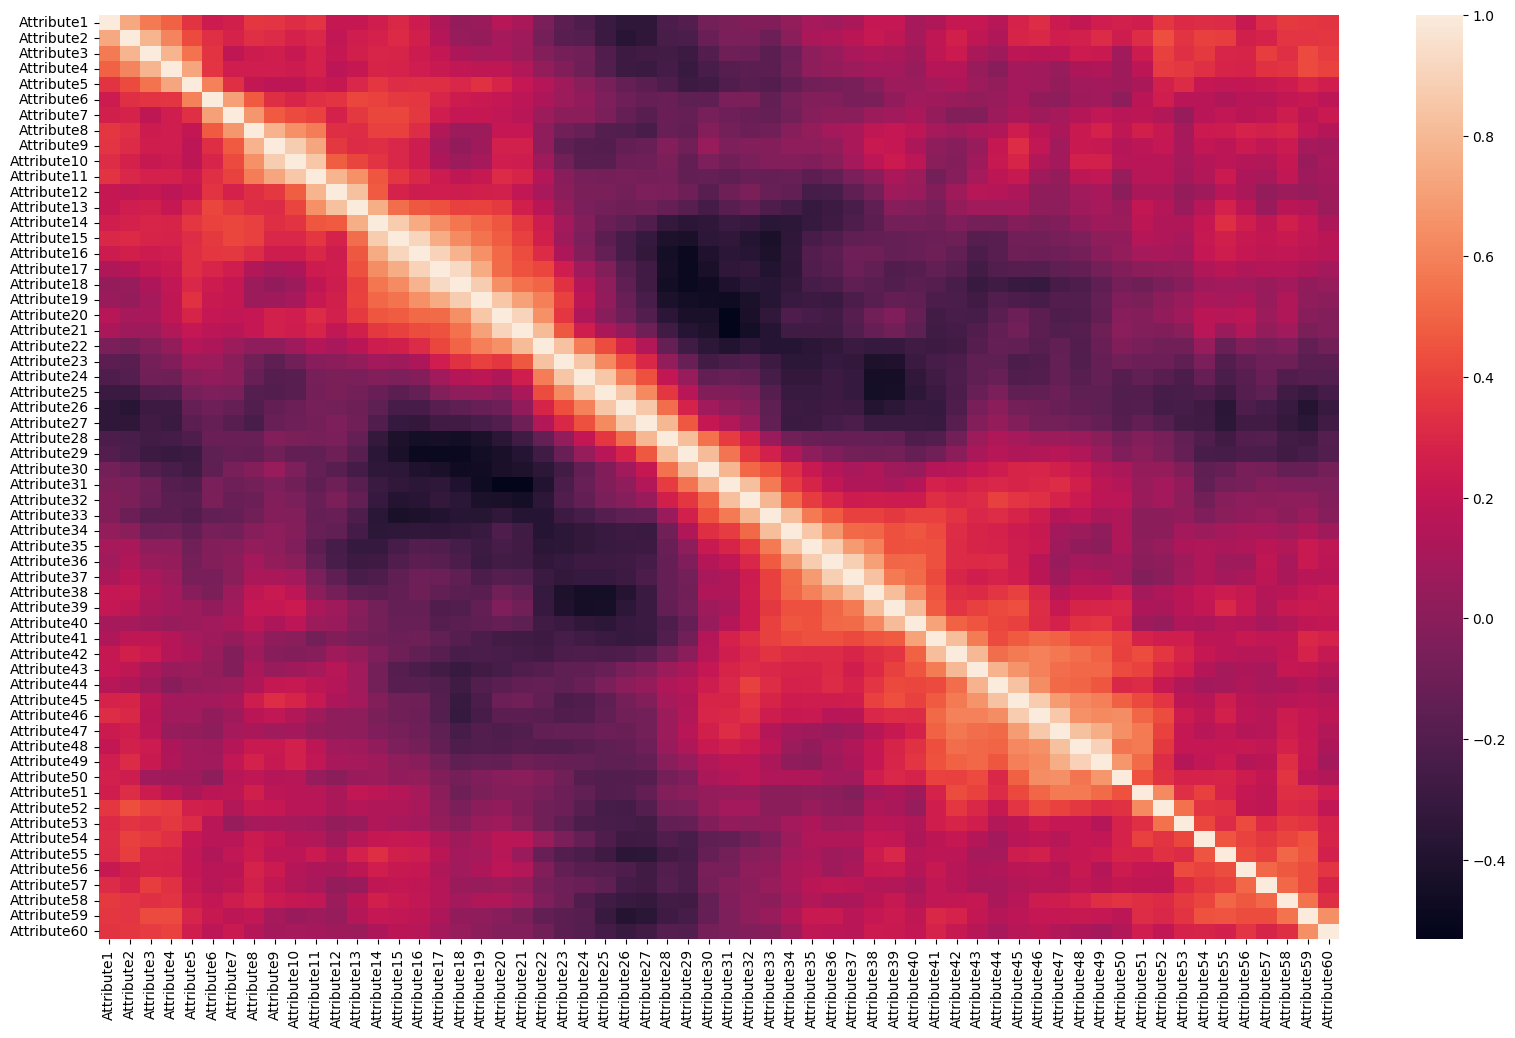

In [ ]:
df = pd.concat([X,y], axis = 1)

plt.figure(figsize=(20,12))
sns.heatmap(X.corr())

O mapa de calor acima representa a correlação entre os diferentes atributos, as cores mais escuras indicam correlação negativa, já as cores mais claras indicam correlação positiva. A diagonal principal cruza o atributo consigo, por isso é uma correlação perfeita (valor 1).

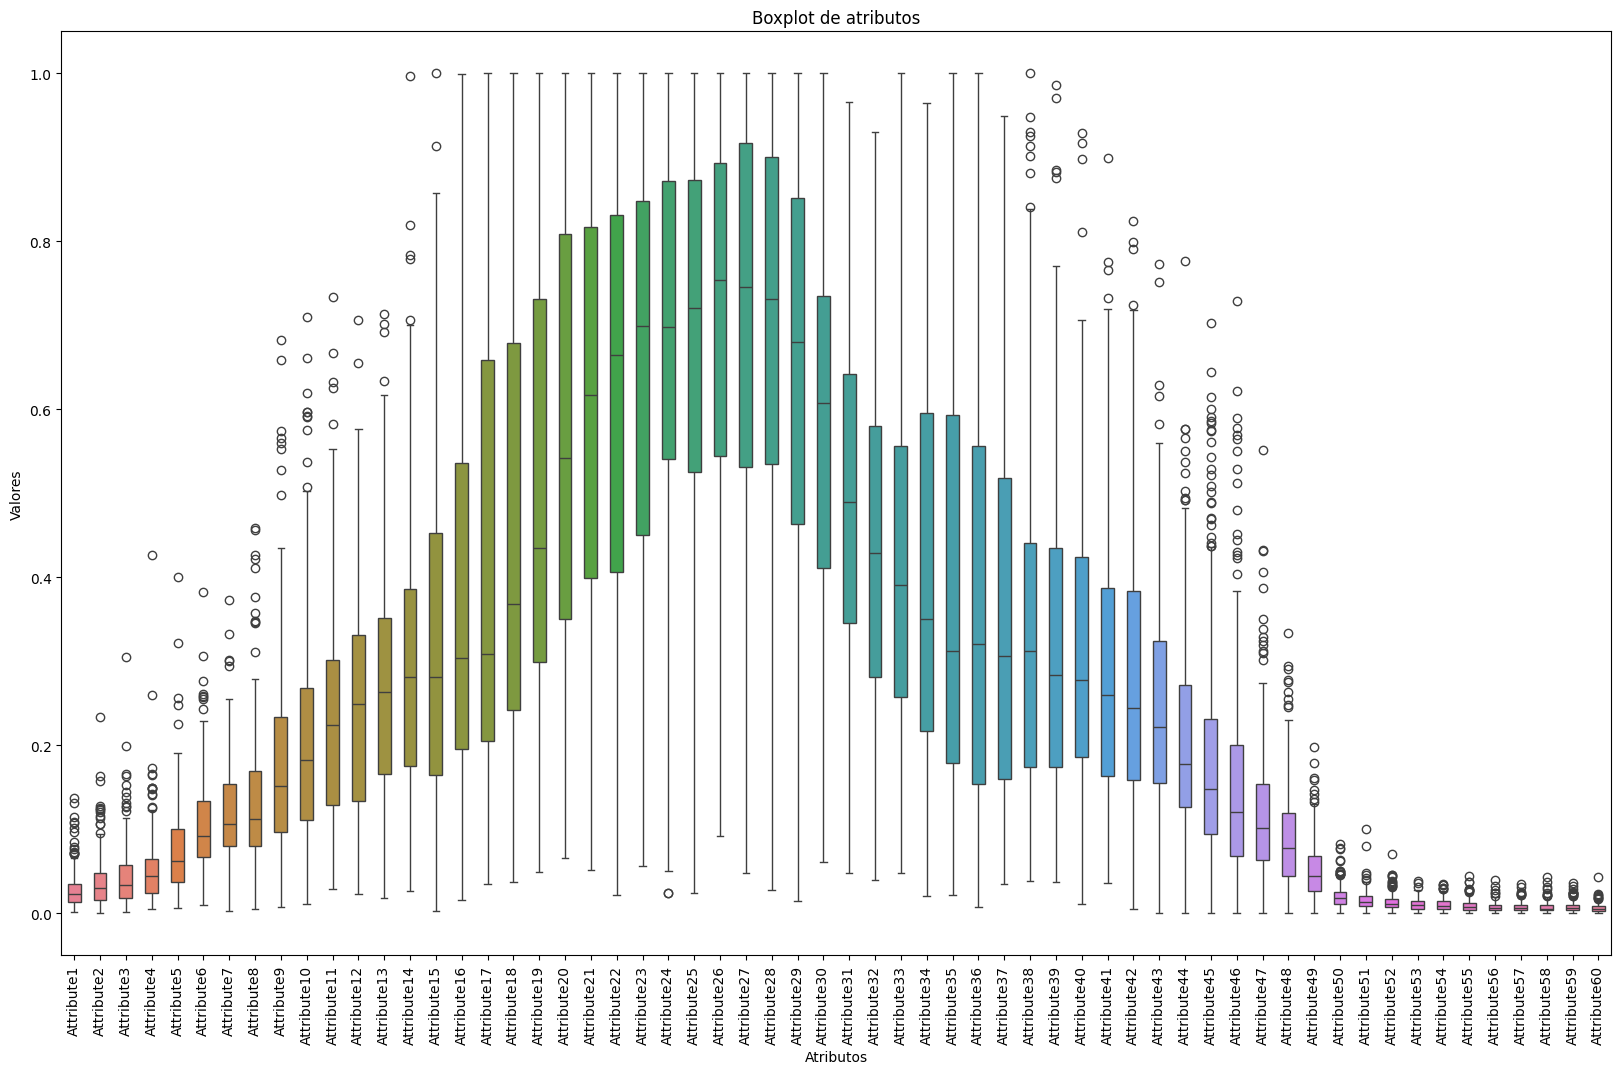

In [ ]:
plt.figure(figsize=(20,12))
sns.boxplot(data=X, width=0.5)
plt.xlabel('Atributos')
plt.ylabel('Valores')
plt.title('Boxplot de atributos')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()

O boxplot com todos os atributos fica confuso e muito volumoso. Portanto, vamos selecionar dois atributos de maior relevância, que seria o atributo 11 e atributo 36.

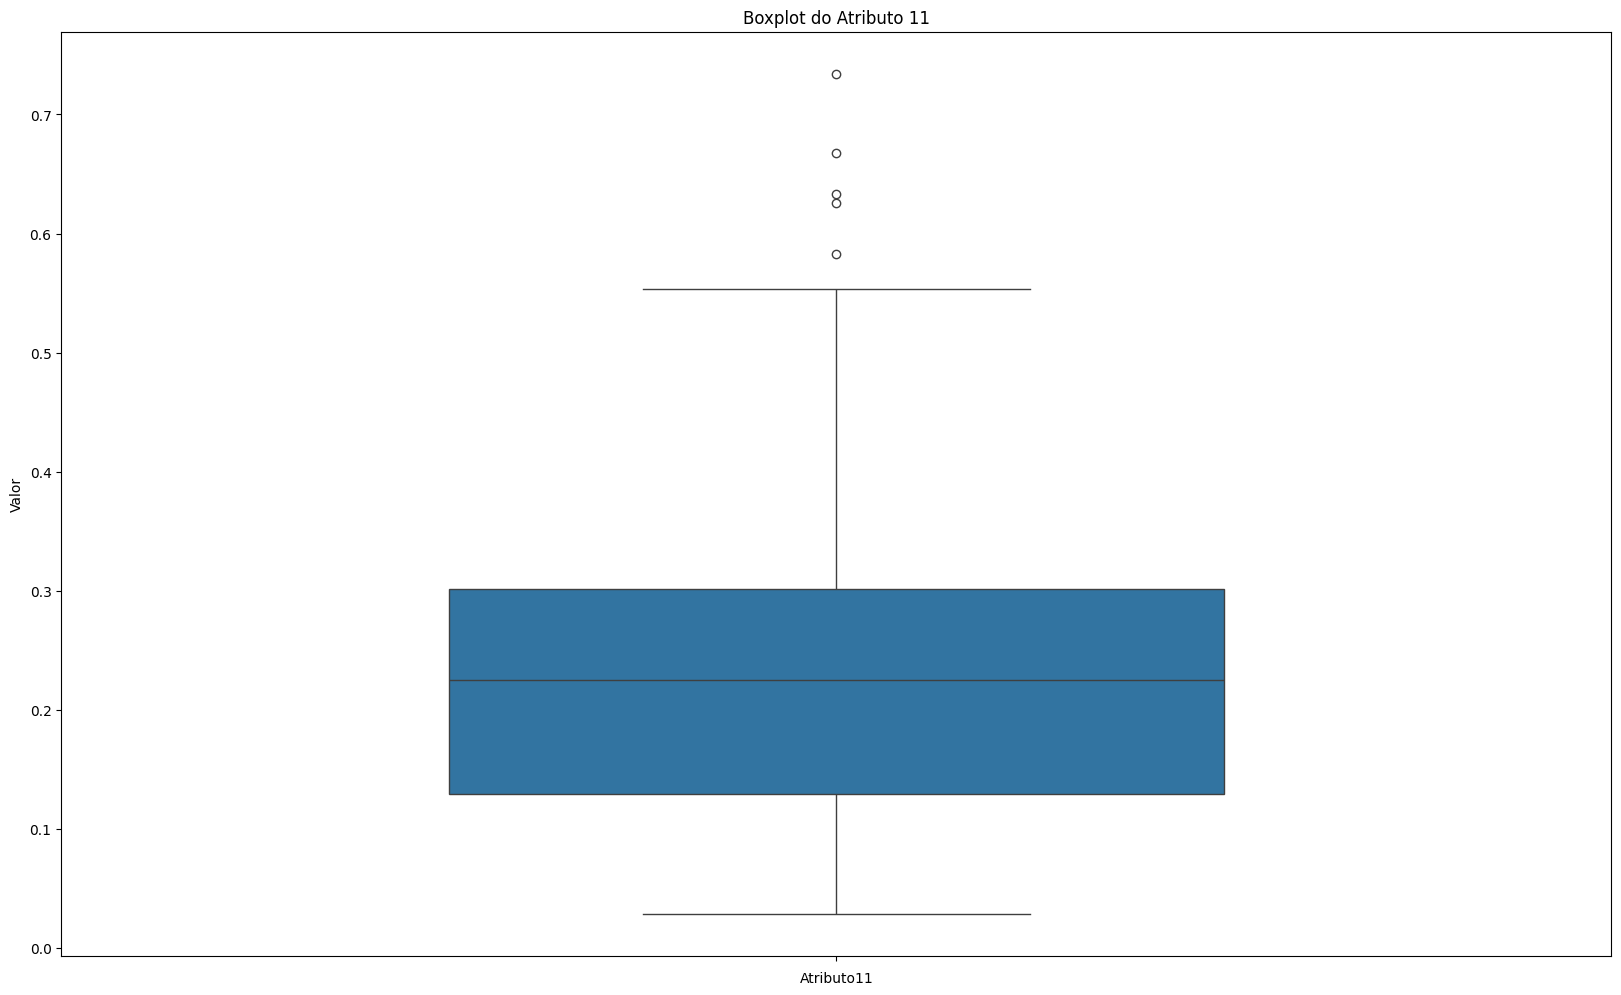

In [ ]:
plt.figure(figsize=(20,12))
sns.boxplot(data=X['Attribute11'], width=0.5)
plt.xlabel('Atributo11')
plt.ylabel('Valor')
plt.title('Boxplot do Atributo 11')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()


O atributo11 (que possui maior correlação positiva), apresenta 4 outliers acima do whisker superior, a box está entre 0.15 e 0.3. Mediana próxima de 0.25.

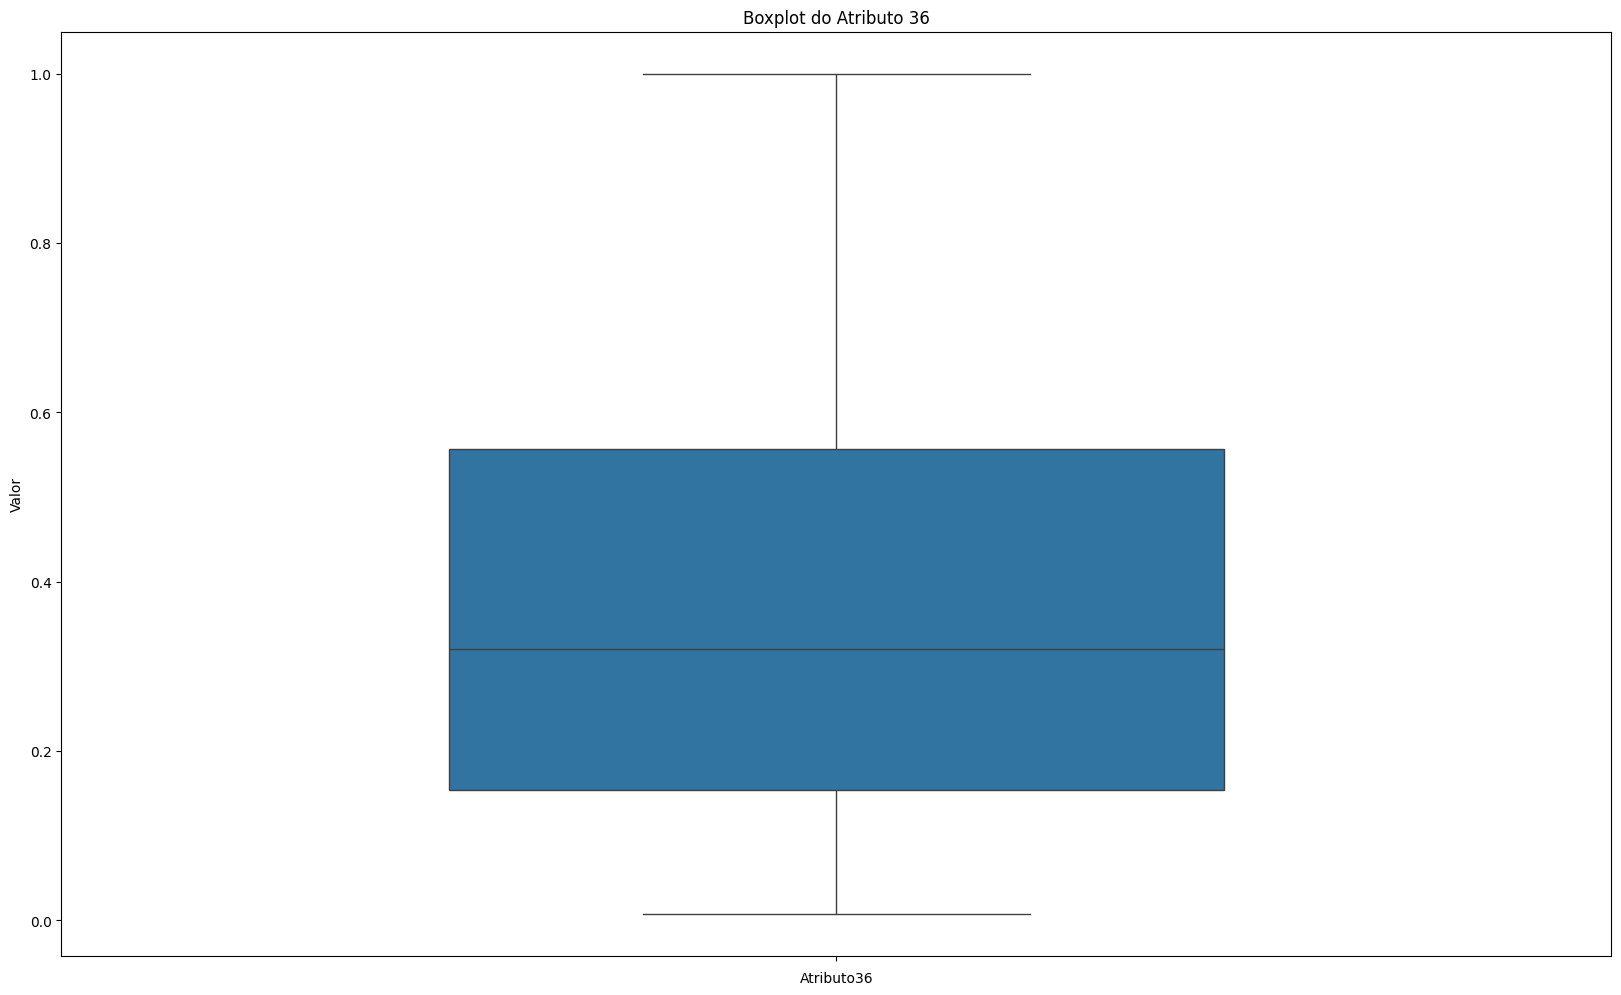

In [ ]:
plt.figure(figsize=(20,12))
sns.boxplot(data=X['Attribute36'], width=0.5)
plt.xlabel('Atributo36')
plt.ylabel('Valor')
plt.title('Boxplot do Atributo 36')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()

O atributo36 (que possui maior correlação negativa), não apresenta outliers, a box está entre 0.18 e 0.55. Mediana próxima de 0.3.

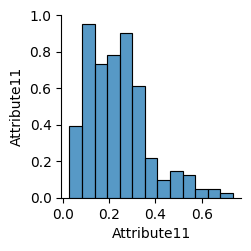

In [ ]:
sns.pairplot(pd.concat([X['Attribute11'], y], axis=1))

Os valores do atributo11 variam de 0 a aproximadamente 0.8. A sua frequência varia de 0 a 1. Frequência mais alta está entre 0.1 e 0.3. Mais baixa 0.4 adiante.

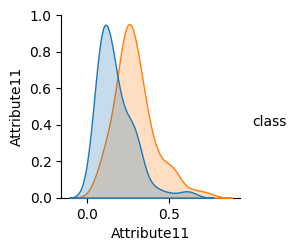

In [ ]:
sns.pairplot(pd.concat([X['Attribute11'], y], axis=1), hue='class')

Os valores do atributo11 variam de 0 a 0.55 aproximadamente. As curvam tem seu pico em 0.1 (ROCHA) e 0.3(MINA).

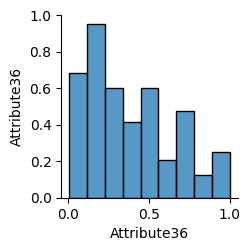

In [ ]:
sns.pairplot(pd.concat([X['Attribute36'], y], axis=1))

Os valores do atributo36 variam de 0 a aproximadamente 1. A sua frequência varia de 0 a 1. Frequência mais alta está em 0.1. Mais baixa 0.8.

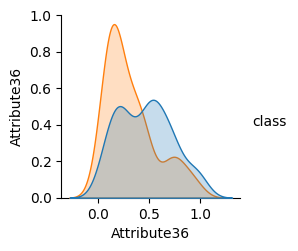

In [ ]:
sns.pairplot(pd.concat([X['Attribute36'], y], axis=1), hue='class')

Os valores do atributo36 variam de 0 a 1 aproximadamente. As curvam tem seu pico em 0.1 (MINA) e 0.6 (ROCHA).

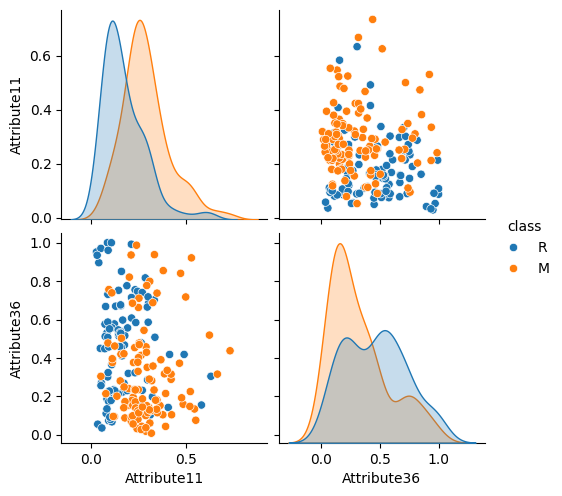

In [ ]:
sns.pairplot(pd.concat([X['Attribute11'], X['Attribute36'], y], axis=1), hue='class')

O gráfico de dispersão mostra que a relação entre os atributos representa que as Classes de Rocha e Mina formam clusters distintos, indicando que são atributos úteis para classificar se é rocha ou mina.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


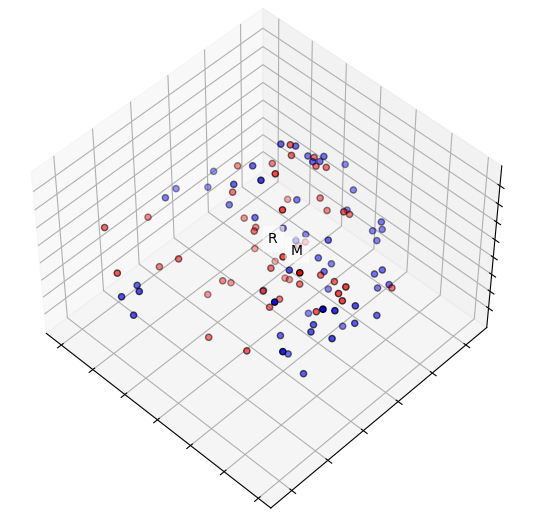

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(6, 5))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

plt.cla()
pca = PCA(n_components=3)
pca.fit(X_train)
X_pca = pca.transform(X_train)


for label, name in [(ind, item) for ind, item in enumerate(["M", "R"])]:
    ax.text3D(
        X_pca[y_train == name, 0].mean(),
        X_pca[y_train == name, 1].mean(),
        0,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )


y_train_mapped = y_train.map({'M': 0, 'R': 1})

# MINA COR AZUL, ROCHA COR VERMELHA
color_map = {0: 'blue', 1: 'red'}


colors = y_train_mapped.map(color_map)

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=colors, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()


PCA explained variance ratio (first two components): [0.30513948 0.22983996]


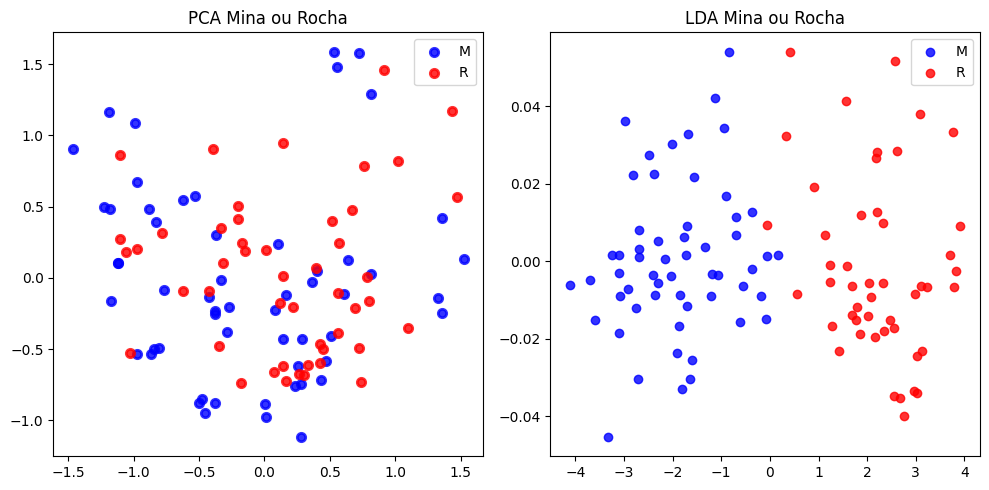

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# PCA
pca = PCA(n_components=2)
X_r_pca = pca.fit(X_train).transform(X_train)

# LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_r_lda = lda.fit(X_train, y_train).transform(X_train)


print("PCA explained variance ratio (first two components):", pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))

# PCA plot
plt.subplot(1, 2, 1)
colors = ["blue", "red"]  # Mina: blue, Rocha: red
lw = 2

for color, label in zip(colors, ["M", "R"]):
    plt.scatter(
        X_r_pca[y_train == label, 0], X_r_pca[y_train == label, 1], color=color, alpha=0.8, lw=lw, label=label
    )
plt.xlabel("")
plt.ylabel("")
plt.title("PCA Mina ou Rocha")
plt.legend()

# LDA plot
plt.subplot(1, 2, 2)
for color, label in zip(colors, ["M", "R"]):
    # ruido adicionado
    y_noise = np.random.normal(0, 0.02, size=X_r_lda[y_train == label].shape)
    plt.scatter(
        X_r_lda[y_train == label], y_noise, alpha=0.8, color=color, label=label
    )
plt.xlabel("")
plt.title("LDA Mina ou Rocha")
plt.legend()

plt.tight_layout()
plt.show()


PCA: demonstra que as duas classes são parcialmente separáveis.
LDA: reduz a dimensionalidade, separou bem as classes.

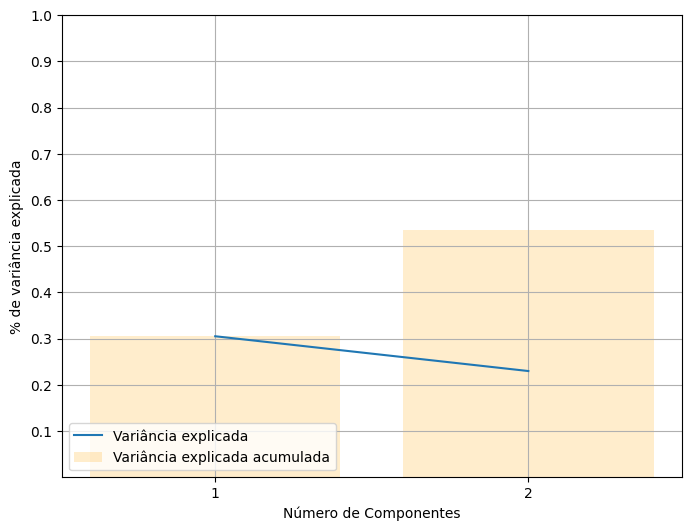

In [ ]:
acum = [sum(pca.explained_variance_ratio_[:i+1]) for i in range(len(pca.explained_variance_ratio_))]

plt.figure(figsize=(8, 6))

plt.plot([1, 2], pca.explained_variance_ratio_, label="Variância explicada")

plt.bar([1, 2], acum, alpha=0.2, color="orange", label="Variância explicada acumulada")

plt.yticks(list(np.arange(0.1, 1.01, 0.1)))
plt.xticks([1, 2])
plt.grid()
plt.xlabel("Número de Componentes")
plt.ylabel("% de variância explicada")

plt.legend(loc='lower left')
plt.show()


In [44]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Analisando a distribuição das classes nos conjuntos de treinamento e teste
unique, counts_train = np.unique(y_train, return_counts=True)
train_class_distribution = dict(zip(unique, counts_train))
print("Distribuição de classes no conjunto de treinamento:")
print(train_class_distribution)

unique, counts_test = np.unique(y_test, return_counts=True)
test_class_distribution = dict(zip(unique, counts_test))
print("Distribuição de classes no conjunto de teste:")
print(test_class_distribution)
print("\n")

def run_grid_search(model, X_train, y_train, param_grid, scoring, refit_metric):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit=refit_metric, return_train_score=True)
    grid_search.fit(X_train, y_train)
    return grid_search

# Definindo o modelo
model = KNeighborsClassifier()

# Definindo o grid de parâmetros
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],  # Variedade de opções para o número de vizinhos
    'p': [1, 2, 3] 
}

# Definindo as métricas de scoring
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='weighted')}

# Executando GridSearchCV para acurácia e f1-score
grid_search_acc = run_grid_search(KNeighborsClassifier(), X_train, y_train, param_grid, scoring, 'accuracy')
grid_search_f1 = run_grid_search(KNeighborsClassifier(), X_train, y_train, param_grid, scoring, 'f1_macro')

best_model_acc = grid_search_acc.best_estimator_
best_model_f1 = grid_search_f1.best_estimator_
print("Best parameters for accuracy:", grid_search_acc.best_params_)
print("Best parameters for F1-score:", grid_search_f1.best_params_)

def print_cv_results(grid_search, metric_name):
    cv_results = grid_search.cv_results_
    metric_test_mean = f'mean_test_{metric_name}'
    metric_test_std = f'std_test_{metric_name}'
    print(f"\nAnálise dos Resultados de Validação Cruzada para {metric_name.replace('_', ' ').title()}:")
    
    for i in range(len(cv_results['params'])):
        print(f"Combinação de parâmetros: {cv_results['params'][i]}")
        print(f"Média do {metric_name} no teste: {cv_results[metric_test_mean][i]}")
        print(f"Desvio padrão do {metric_name} no teste: {cv_results[metric_test_std][i]}")
        for j in range(grid_search.cv):
            print(f"Score de {metric_name} no fold {j + 1} do teste:", cv_results[f'split{j}_test_{metric_name}'][i])

# Chamando a função para imprimir os resultados de cada métrica
print_cv_results(grid_search_acc, 'accuracy')
print_cv_results(grid_search_f1, 'f1_macro')

# Avaliando o modelo de acurácia no conjunto de treinamento e teste
train_score_acc = best_model_acc.score(X_train, y_train)
test_score_acc = best_model_acc.score(X_test, y_test)
print("Train set accuracy:", train_score_acc)
print("Test set accuracy:", test_score_acc)

# Fazendo previsões no conjunto de treinamento
y_pred_train_f1 = best_model_f1.predict(X_train)
train_f1_score = f1_score(y_train, y_pred_train_f1, average='weighted')
print("Train set F1-score:", train_f1_score)

# Fazendo previsões no conjunto de testes
y_pred_test_f1 = best_model_f1.predict(X_test)
test_f1_score = f1_score(y_test, y_pred_test_f1, average='weighted')
print("Test set F1-score:", test_f1_score)


# Comparando os objetos dos modelos
print("Comparando os objetos dos modelos:")
print("Os modelos são o mesmo objeto? ", best_model_acc is best_model_f1)

Distribuição de classes no conjunto de treinamento:
{'M': 85, 'R': 81}
Distribuição de classes no conjunto de teste:
{'M': 26, 'R': 16}


Best parameters for accuracy: {'n_neighbors': 3, 'p': 2}
Best parameters for F1-score: {'n_neighbors': 3, 'p': 2}

Análise dos Resultados de Validação Cruzada para Accuracy:
Combinação de parâmetros: {'n_neighbors': 3, 'p': 1}
Média do accuracy no teste: 0.777005347593583
Desvio padrão do accuracy no teste: 0.05652732165161099
Score de accuracy no fold 1 do teste: 0.7941176470588235
Score de accuracy no fold 2 do teste: 0.6666666666666666
Score de accuracy no fold 3 do teste: 0.7878787878787878
Score de accuracy no fold 4 do teste: 0.8181818181818182
Score de accuracy no fold 5 do teste: 0.8181818181818182
Combinação de parâmetros: {'n_neighbors': 3, 'p': 2}
Média do accuracy no teste: 0.7830659536541891
Desvio padrão do accuracy no teste: 0.04477525342979325
Score de accuracy no fold 1 do teste: 0.7941176470588235
Score de accuracy no fold 2 do test

O primeiro componente principal explica cerca de 30% da variância, enquanto o segundo componente principal explica cerca de 20% da variância.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
model = Pipeline(steps=[
    ('scale', StandardScaler()),
    #('reduce_dims', PCA()),
    ('classifier', KNeighborsClassifier()),
])

In [45]:
# Hyperparameter tuning with cross-validation
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],  # Variedade de opções para o número de vizinhos
    'p': [1, 2, 3] 
}

Primeiro vamos encontrar os melhores hiperparâmetros para o primeiro modelo que busca uma acurácia melhor.

In [46]:
grid_search_acc = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)

Agora, vamos encontrar os melhores hiperparâmetros para o segundo modelo que busca um F1 Score Melhor.

In [47]:
grid_search_f1 = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro', return_train_score=True)

In [48]:
grid_search_acc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10, 15], 'p': [1, 2, 3]},
             return_train_score=True, scoring='accuracy')

In [49]:
print("Best parameters:", grid_search_acc.best_params_)

Best parameters: {'n_neighbors': 3, 'p': 2}


In [50]:
grid_search_f1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10, 15], 'p': [1, 2, 3]},
             return_train_score=True, scoring='f1_macro')

In [51]:
print("Best parameters:", grid_search_f1.best_params_)

Best parameters: {'n_neighbors': 3, 'p': 2}


In [52]:
# Train the model acuracia with the best hyperparameters
best_model_acc = grid_search_acc.best_estimator_
best_model_acc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
# Train the model f1 with the best hyperparameters
best_model_f1 = grid_search_f1.best_estimator_
best_model_f1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
# Evaluate the model on the train set
train_score_acc = best_model_acc.score(X_train, y_train)
print("Train set accuracy:", train_score_acc)



Train set accuracy: 0.8674698795180723


In [55]:
test_score_acc = best_model_acc.score(X_test, y_test)
print("Test set accuracy:", test_score_acc)

Test set accuracy: 0.8809523809523809


In [56]:
from sklearn.metrics import f1_score

# Fazendo previsões no conjunto de treinamento
y_pred_train_f1 = best_model_f1.predict(X_train)
train_f1_score = f1_score(y_train, y_pred_train_f1, average='weighted')
print("Train set F1-score:", train_f1_score)


Train set F1-score: 0.867315617774459


In [57]:
# Fazendo previsões no conjunto de testes
y_pred_test_f1 = best_model_f1.predict(X_test)
test_f1_score = f1_score(y_test, y_pred_test_f1, average='weighted')
print("Test set F1-score:", test_f1_score)

Test set F1-score: 0.8815889992360582


In [23]:
from sklearn.metrics import confusion_matrix

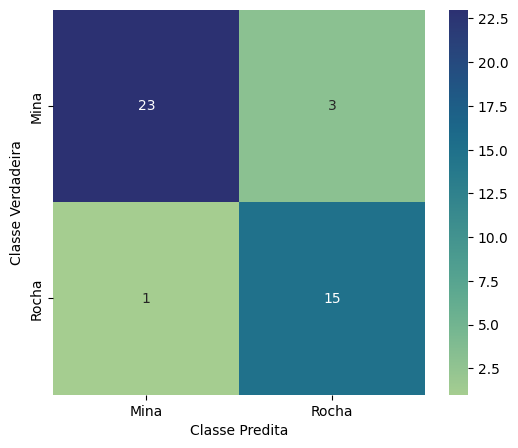

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_test_pred_acc = best_model_acc.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred_acc)


df_cm = pd.DataFrame(cm, index=["Mina", "Rocha"], columns=["Mina", "Rocha"])


plt.figure(figsize=(6, 5))
sns.heatmap(df_cm, annot=True, cmap="crest")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.show()


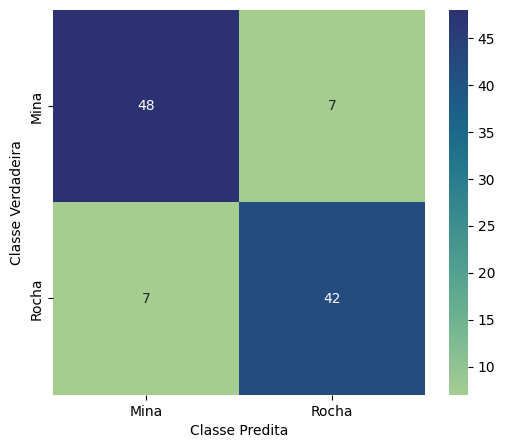

In [ ]:

y_test_pred_f1 = best_model_f1.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred_f1)


df_cm = pd.DataFrame(cm, index=["Mina", "Rocha"], columns=["Mina", "Rocha"])


plt.figure(figsize=(6, 5))
sns.heatmap(df_cm, annot=True, cmap="crest")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.show()

In [ ]:
error_inds = y_test_pred_acc != y_test
print(X_test[error_inds])

     Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
171      0.0179      0.0136      0.0408      0.0633      0.0596      0.0808   
164      0.0163      0.0198      0.0202      0.0386      0.0752      0.1444   
101      0.0335      0.0134      0.0696      0.1180      0.0348      0.1180   
45       0.0408      0.0653      0.0397      0.0604      0.0496      0.1817   
115      0.0414      0.0436      0.0447      0.0844      0.0419      0.1215   
12       0.0079      0.0086      0.0055      0.0250      0.0344      0.0546   
35       0.0206      0.0132      0.0533      0.0569      0.0647      0.1432   
28       0.0100      0.0275      0.0190      0.0371      0.0416      0.0201   
97       0.0491      0.0279      0.0592      0.1270      0.1772      0.1908   
26       0.0151      0.0320      0.0599      0.1050      0.1163      0.1734   
139      0.0164      0.0627      0.0738      0.0608      0.0233      0.1048   
46       0.0308      0.0339      0.0202      0.0889 

In [ ]:
error_inds_2 = y_test_pred_f1 != y_test
print(X_test[error_inds_2])

     Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
171      0.0179      0.0136      0.0408      0.0633      0.0596      0.0808   
164      0.0163      0.0198      0.0202      0.0386      0.0752      0.1444   
101      0.0335      0.0134      0.0696      0.1180      0.0348      0.1180   
45       0.0408      0.0653      0.0397      0.0604      0.0496      0.1817   
115      0.0414      0.0436      0.0447      0.0844      0.0419      0.1215   
12       0.0079      0.0086      0.0055      0.0250      0.0344      0.0546   
35       0.0206      0.0132      0.0533      0.0569      0.0647      0.1432   
28       0.0100      0.0275      0.0190      0.0371      0.0416      0.0201   
97       0.0491      0.0279      0.0592      0.1270      0.1772      0.1908   
26       0.0151      0.0320      0.0599      0.1050      0.1163      0.1734   
139      0.0164      0.0627      0.0738      0.0608      0.0233      0.1048   
46       0.0308      0.0339      0.0202      0.0889 